In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

# Definitions

Suppose there are $p=2$ features: $X_1, X_2$.

* The 1st principal component is $$Z_1 = \phi_{11}X_1 + \phi_{21}X_2,$$ such that $$\phi_{11}^2 + \phi_{21}^2 = 1.$$

* $\phi_{11}, \phi_{21}$ is called the **loading** of the 1st principal component.

* $\phi_1 = \begin{bmatrix} \phi_{11} \\ \phi_{21} \end{bmatrix}$ is the **loading vector** of the 1st principal component. The constraint above, $\phi_{11}^2 + \phi_{21}^2 = 1$, controls the arbitrarily large variance of this loading vector.  

* $Z_1$ is called the **score** of the 1st principal component. These are the projected values obtained when the data points are projected onto the direction of this principal component.

* The 2nd principal component is $$Z_2 = \phi_{12}X_1 + \phi_{22}X_2$$ contrained to $\phi_{12}^2 + \phi_{22}^2 = 1$. Each principal component indicates the directions along which the original data are highly variable. That is, 
    * $Z_1$ and $Z_2$ are uncorrelated. This is equivalent to $\phi_1 \perp \phi_2$.

These definitions extend naturally when $p>2$.

In [2]:
data = pd.read_csv("../../data/csv/USArrests.csv")
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.shape

(50, 5)

In [4]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Scale Data

Since PCA is not scale invariant, scale the data to mean = 0 and standard deviation = 1 before performing PCA

In [5]:
scaler = StandardScaler()
data.iloc[:, 1:] = scaler.fit_transform(data.iloc[:, 1:])
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814


In [6]:
# all means are 0 and standard deviations are 1
data.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-7.105427e-17,1.387779e-16,-4.396483e-16,8.593126e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


# Principal Components & Loadings Vector

Since there are 4 numeric columns, we expect 4 principal components and 4 loading vectors corresponding to each of the principal components. That is, 

$PC1 = \phi_{Murder,1} \cdot X_{Murder} + \phi_{Assault,1} \cdot X_{Assault} + \phi_{UrbanPop,1} \cdot X_{UrbanPop} + \phi_{Rape,1} \cdot X_{Rape}$
$PC2 = \phi_{Murder,2} \cdot X_{Murder} + \phi_{Assault,2} \cdot X_{Assault} + \phi_{UrbanPop,2} \cdot X_{UrbanPop} + \phi_{Rape,2} \cdot X_{Rape}$
$PC3 = \phi_{Murder,3} \cdot X_{Murder} + \phi_{Assault,3} \cdot X_{Assault} + \phi_{UrbanPop,3} \cdot X_{UrbanPop} + \phi_{Rape,3} \cdot X_{Rape}$
$PC4 = \phi_{Murder,4} \cdot X_{Murder} + \phi_{Assault,4} \cdot X_{Assault} + \phi_{UrbanPop,4} \cdot X_{UrbanPop} + \phi_{Rape,4} \cdot X_{Rape}$

The length of each $PC1, \dots, PC4$ will be $n=50$. These principal component score vectors serve as features in a lower dimensional space and can be used to perform regression.

In general, there will be $\min(n-1, p)$ principal components.

In [7]:
pca = PCA()
# principal components
pd.DataFrame(pca.fit_transform(data.iloc[:, 1:]),
             columns=['PC1', 'PC2', 'PC3', 'PC4'], 
             index = data.iloc[:, 0])

,PC1,PC2,PC3,PC4
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


In [8]:
# Loadings vector
pd.DataFrame(pca.fit(data.iloc[:, 1:]).components_.T, 
             index = data.iloc[:, 1:].columns, 
             columns = ['V1', 'V2', 'V3', 'V4'])

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [9]:
pca.n_components_

4

# How Many Principal Components to Use?

The 1st principal component explains 62% of the variance in the data, the 2nd principal component explains 24.7% of the variance in the data, etc. Combined they explain ~87% of the variance in the data. Refer to the elbow in the scree plot to determine how many principal components to use. Two principal components seem to be appropriate for this data.

In [10]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

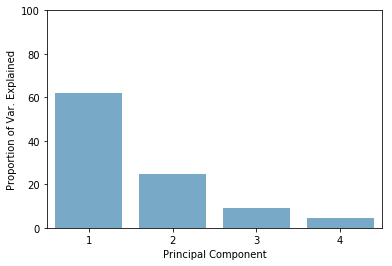

In [11]:
# Scree plot
fig = sns.barplot(x = np.array(range(1, pca.n_components_+1)), 
                  y = pca.explained_variance_ratio_*100,
                  palette = sns.color_palette("Blues", 1))
fig.set(xlabel = 'Principal Component', 
        ylabel = 'Proportion of Var. Explained', 
        ylim = (0, 100));